Libraries


In [ ]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
import string
from pickle import dump
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
import nltk
from nltk.corpus import stopwords
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Data Loading

In [ ]:
df = pd.read_csv("/content/Phishing_Email.csv",low_memory=False )
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [ ]:
# Show dataset statistics
df.describe()

,Unnamed: 0
count,18650.000000
mean,9325.154477
std,5384.327293
min,0.000000
25%,4662.250000
50%,9325.500000
75%,13987.750000
max,18650.000000


In [ ]:
df['Email Type'] = df['Email Type'].map({'Safe Email': 0, 'Phishing Email': 1})
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0
1,1,the other side of * galicismos * * galicismo *...,0
2,2,re : equistar deal tickets are you still avail...,0
3,3,\nHello I am your hot lil horny toy.\n I am...,1
4,4,software at incredibly low prices ( 86 % lower...,1


In [ ]:
# Show dataset statistics
df.describe()

,Unnamed: 0,Email Type
count,18650.000000,18650.000000
mean,9325.154477,0.392922
std,5384.327293,0.488413
min,0.000000,0.000000
25%,4662.250000,0.000000
50%,9325.500000,0.000000
75%,13987.750000,1.000000
max,18650.000000,1.000000


Data cleaning

In [ ]:
#remove unnamed column
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0
1,the other side of * galicismos * * galicismo *...,0
2,re : equistar deal tickets are you still avail...,0
3,\nHello I am your hot lil horny toy.\n I am...,1
4,software at incredibly low prices ( 86 % lower...,1


In [ ]:
# Show dataset statistics
df.describe()

,Email Type
count,18650.000000
mean,0.392922
std,0.488413
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
# Show dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Email Text  18634 non-null  object
 1   Email Type  18650 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 291.5+ KB


In [ ]:
# Count missing values in each column and print the result
missing_values = df.isnull().sum()
#print(missing_values)
missing_values.head()

Email Text    16
Email Type     0
dtype: int64

In [ ]:
# drop the rows with empty fields
df = df.dropna(subset=['Email Text'])

In [ ]:
# Show dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18634 entries, 0 to 18649
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Email Text  18634 non-null  object
 1   Email Type  18634 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 436.7+ KB


In [ ]:
#check if the empty rows was deleted successfully
# Count missing values in each column and print the result
missing_values = df.isnull().sum()
#print(missing_values)
missing_values.head()

Email Text    0
Email Type    0
dtype: int64

In [ ]:
# Show dataset statistics
df.describe()

,Email Type
count,18634.000000
mean,0.392401
std,0.488298
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
# Cleaning data from punctuation and stopwords and then tokenizing it into words (tokens)
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean

In [ ]:
# Fit the CountVectorizer to data
message = CountVectorizer(analyzer=process).fit_transform(df['Email Text'])

In [ ]:
# Save the vectorizer
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(message, file)

In [ ]:
# Show dataset statistics
df.describe()

,Email Type
count,18634.000000
mean,0.392401
std,0.488298
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Data Visualization

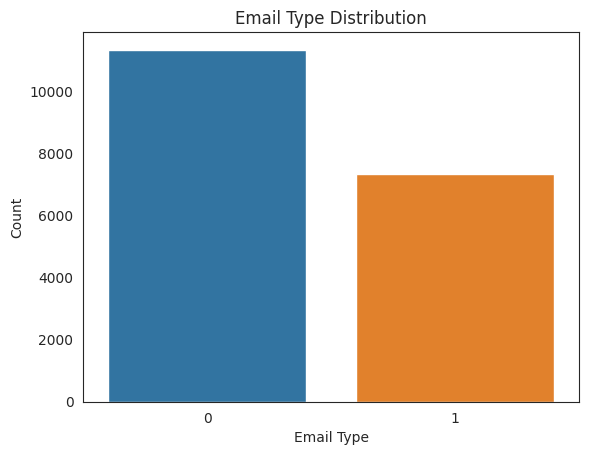

In [ ]:
# Visualize email type frequenices using bar chart
plt.figure(dpi=100)

sns.countplot(data=df, x='Email Type')

plt.title("Email Type Distribution")
plt.xlabel("Email Type")
plt.ylabel("Count")

# Display the plot
plt.show()


Data Splitting

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(message, df['Email Type'], test_size=0.20, random_state=0)

The Model

In [ ]:
# Model creation
model = MultinomialNB()

In [ ]:
# Model training
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Model saving
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
# Model predictions on test set
y_pred = model.predict(X_test)

In [ ]:
# Model Evaluation | Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100

94.7947410786155

In [ ]:
# Model Evaluation | Classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      2270
           1       0.90      0.97      0.94      1457

    accuracy                           0.95      3727
   macro avg       0.94      0.95      0.95      3727
weighted avg       0.95      0.95      0.95      3727



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.9479474107861551
Precision: 0.900952380952381
Recall: 0.9739190116678106
F1 Score: 0.9360158311345647
Confusion Matrix:
 [[2114  156]
 [  38 1419]]


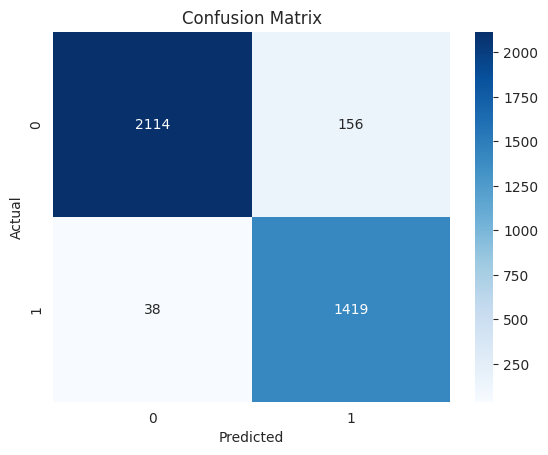

In [ ]:
# Model Evaluation | Confusion matrix
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()